# NLP With Hotel Review

In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
# load the data sets
df = pd.read_csv('Hotel_Reviews.csv')

In [50]:
# firat look at the columns
df.columns

Index(['Unnamed: 0', 'Additional_Number_of_Scoring', 'Average_Score',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'Days_Since_Review', 'Latitude', 'Longitude', 'Day', 'Month', 'Year',
       'Reviewer_Nationality_Australia', 'Reviewer_Nationality_Ireland',
       'Reviewer_Nationality_UAE', 'Reviewer_Nationality_UK',
       'Reviewer_Nationality_USA', 'Reviewer_Nationality_Other',
       'Hotel_Address_Amsterdam', 'Hotel_Address_Barcelona',
       'Hotel_Address_London', 'Hotel_Address_Milan', 'Hotel_Address_Paris',
       'Hotel_Address_Vienna', 'Leisure_Trip', 'Nights_Stayed'],
      dtype='object')

In [51]:
# check the info for the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 30 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Unnamed: 0                                  515738 non-null  int64  
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Average_Score                               515738 non-null  float64
 3   Negative_Review                             515738 non-null  object 
 4   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 5   Total_Number_of_Reviews                     515738 non-null  int64  
 6   Positive_Review                             515738 non-null  object 
 7   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 9   Reviewer_Score                              515738 non-null  int64  
 

In [52]:
# first look at the negative reviews
df['Negative_Review'].value_counts()

Negative_Review
No Negative                                                                                                                                                                                                                127890
 Nothing                                                                                                                                                                                                                    14295
 Nothing                                                                                                                                                                                                                     4236
 nothing                                                                                                                                                                                                                     2225
 N A                                                                            

In [53]:
# take brief look at first 15 columns
df.iloc[:5,:15]

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month
0,0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,52.360576,4.915968,3,8
1,1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,52.360576,4.915968,3,8
2,2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,52.360576,4.915968,31,7
3,3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,52.360576,4.915968,31,7
4,4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,52.360576,4.915968,24,7


In [54]:
# take brief look at last 15 columns
df.iloc[:5,15:30]

,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,2017,0,0,0,0,0,1,1,0,0,0,0,0,1,6
1,2017,0,1,0,0,0,0,1,0,0,0,0,0,1,4
2,2017,1,0,0,0,0,0,1,0,0,0,0,0,1,3
3,2017,0,0,0,1,0,0,1,0,0,0,0,0,1,3
4,2017,0,0,0,0,0,1,1,0,0,0,0,0,1,2


In [57]:
# checking for missing value
df.isna().sum()

Unnamed: 0                                    0
Additional_Number_of_Scoring                  0
Average_Score                                 0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Days_Since_Review                             0
Latitude                                      0
Longitude                                     0
Day                                           0
Month                                         0
Year                                          0
Reviewer_Nationality_Australia                0
Reviewer_Nationality_Ireland                  0
Reviewer_Nationality_UAE                      0
Reviewer_Nationality_UK                       0
Reviewer_Nationality_USA                

In [58]:
# checking for duplicated data
df.duplicated().sum()

0

In [59]:
# a brief look at data target
df['Reviewer_Score'].value_counts()

Reviewer_Score
1    293974
0    221764
Name: count, dtype: int64

In [62]:
good_percent, bad_percent = df['Reviewer_Score'].value_counts() /df.shape[0]

In [66]:
print(f'Good reviews: {good_percent * 100} %')
print(f'Bad reviews: {bad_percent * 100} %')

Good reviews: 57.000647615649804 %
Bad reviews: 42.99935238435019 %


#### The data target is almost balenced

In [70]:
print("Number of Unique Positive reviews: ",end="")
print(df['Positive_Review'].value_counts().shape[0])
print("Number of Unique Negative reviews: ",end="")
print(df['Negative_Review'].value_counts().shape[0])

Number of Unique Positive reviews: 412601
Number of Unique Negative reviews: 330011


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

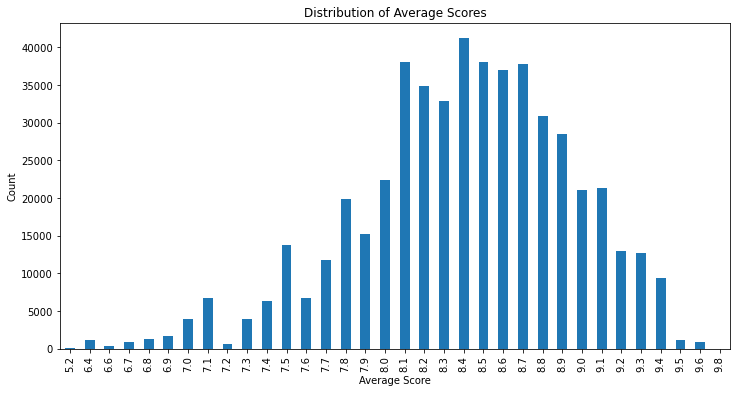

In [77]:
# Count the values and sort
score_counts = df['Average_Score'].value_counts().sort_index()

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot the bar chart
score_counts.plot(kind='bar')
plt.xlabel('Average Score')
plt.ylabel('Count')
plt.title('Distribution of Average Scores')

# Overlay with KDE
sns.kdeplot(df['Average_Score'], color='red', bw_adjust=0.5)

# Show the plot
plt.show()


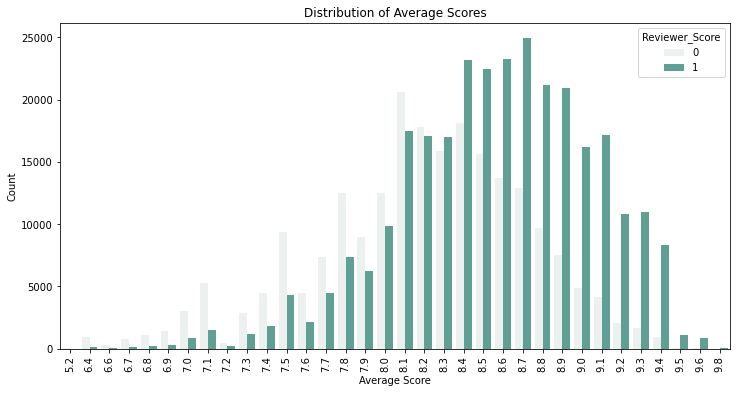

In [88]:
# Assuming df is your DataFrame and Average_Score and Reviewer_Score are the columns
plt.figure(figsize=(12, 6))  # Set the size of the plot
sns.countplot(x='Average_Score', hue='Reviewer_Score', data=df, palette="light:#5A9")

plt.xlabel('Average Score')  # Set the x-axis label
plt.ylabel('Count')          # Set the y-axis label
plt.title('Distribution of Average Scores')  # Set the title of the plot

plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability if needed

plt.show()



In [41]:
import pandas as pd

# Assuming df is your DataFrame
# Extracting columns related to Reviewer_Nationality and Hotel_Address
reviewer_nationality_cols = [col for col in df.columns if 'Reviewer_Nationality' in col]
hotel_address_cols = [col for col in df.columns if 'Hotel_Address' in col]

# Function to get the category name
def get_category(row, columns):
    for col in columns:
        if row[col] == 1:
            return col.split('_')[-1]
    return None

# Apply the function to each row
df['Reviewer_Nationality'] = df.apply(lambda row: get_category(row, reviewer_nationality_cols), axis=1)
df['Hotel_Address'] = df.apply(lambda row: get_category(row, hotel_address_cols), axis=1)

# Optionally, drop the original dummy columns
df.drop(reviewer_nationality_cols + hotel_address_cols, axis=1, inplace=True)


In [42]:
df.head()

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Leisure_Trip,Nights_Stayed,Reviewer_Nationality,Hotel_Address
0,0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,52.360576,4.915968,3,8,2017,1,6,Other,Amsterdam
1,1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,52.360576,4.915968,3,8,2017,1,4,Ireland,Amsterdam
2,2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,52.360576,4.915968,31,7,2017,1,3,Australia,Amsterdam
3,3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,52.360576,4.915968,31,7,2017,1,3,UK,Amsterdam
4,4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,52.360576,4.915968,24,7,2017,1,2,Other,Amsterdam
